## Performance Trends in Employee Agents Management (Flag 61)

### Dataset Description

The dataset comprises two key tables simulating ServiceNow platform: the `sys_user` table and the `incidents` table, each with 500 entries. The `incidents` table focuses on detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like location, description, and priority. It effectively captures incident management activities with fields including 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories. The `sys_user` table, on the other hand, contains user-related information, focusing on the details of employees or system users. This includes fields such as 'user_id', 'name', 'role', 'email', 'schedule', and 'department', providing insights into the user profiles managed within the ServiceNow system. Together, these tables are instrumental in understanding the workflow, user involvement and detailed tracking of incident resolution processes within an organization.


### Your Task
**Goal**: Given the user and incidents tabular data, analyze discrepancies in the performance of human agents, particularly focusing on a certain human agent, to understand the underlying causes of performance dips and devise strategies to manage workload during absence periods.

**Role**: Team Lead

**Difficulty**: 4 out of 5. This task requires comprehensive data analysis to identify performance trends and their correlations with operational factors, merging information from two tables, demanding advanced analytical skills and regression analysis.

**Category**: User Management


## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load User Agent Dataset
This cell loads user agent dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
user_dataset_path = "csvs/flag-61-sysuser.csv"
df_usr = pd.read_csv(user_dataset_path)
df_usr.head()

,sys_id,schedule,manager,phone,user_name,name,location,department,title,email
0,46b87022a9fe198101a78787e40d7547,NaN,NaN,NaN,charlie.whitherspoon,Charlie Whitherspoon,"945 South Birch Street, Glendale,CO",Sales,NaN,charlie.whitherspoon@example.com
1,46ca0887a9fe19810191e08e51927ebf,NaN,NaN,NaN,howard.johnson,Howard Johnson,"601 College Street, Clarksville,TN",Sales,NaN,howard.johnson@example.com
2,46d44a23a9fe19810012d100cca80666,NaN,NaN,NaN,beth.anglin,Beth Anglin,"6304 Northwest Barry Road, Kansas City,MO",Sales,NaN,beth.anglin@example.com
3,46d96f57a9fe198101947a9620895886,NaN,NaN,NaN,luke.wilson,Luke Wilson,"322 West 52nd Street, New York,NY",Sales,NaN,luke.wilson@example.com
4,5137153cc611227c000bbd1bd8cd2005,"[(Timestamp('2023-06-01 00:00:00'), Timestamp(...",NaN,NaN,fred.luddy,Fred Luddy,"650 Dennery Road #102, San Diego,CA",Development,Programmer,fred.luddy@example.com


### Load Incidents Dataset
This cell loads the second dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [3]:
dataset_path = "csvs/flag-61.csv"
df = pd.read_csv(dataset_path)
df.head()


,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware


### **Question 1: What is the overall average Time to Resolution (TTR) for all agents over the recent period?**

#### Plot average resolution time by Agent
This cell creates a bar plot to visualize the average Time to Resolution (TTR) for incidents handled by each agent over the recent period. By examining this average resolution times, the plot provides insights into the efficiency and effectiveness of each agent in resolving incidents. This information could be crucial for assessing performance disparitiese.

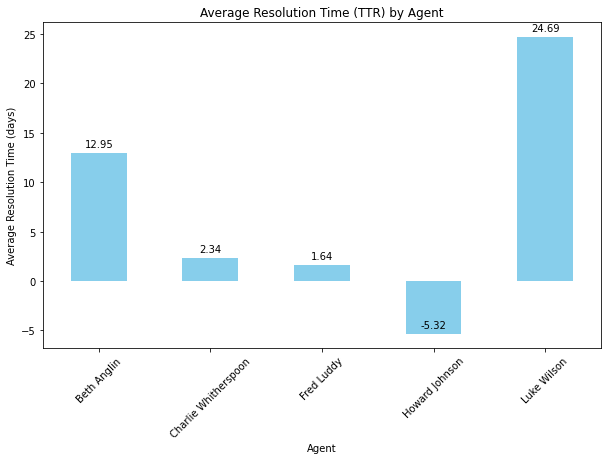

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset_path is defined and points to the correct CSV file
df = pd.read_csv(dataset_path)

# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

# Compute TTR in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

# Group by 'assigned_to' and compute the average resolution time for each agent
avg_ttr_by_agent = df.groupby("assigned_to")["resolution_time"].mean()

# Plotting the average TTR of each agent as a histogram
ax = avg_ttr_by_agent.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title("Average Resolution Time (TTR) by Agent")
plt.xlabel("Agent")
plt.ylabel("Average Resolution Time (days)")
plt.xticks(rotation=45)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

#### Generate JSON Description for the Insight

In [5]:
{
    "data_type": "descriptive",
    "insight": "Luke Wilson has highest average TTR among agents",
    "insight_value": {
        "x_val": "Luke Wilson", 
        "y_val": 24.69
    },
    "plot": {
        "plot_type": "histogram",
        "title": "Average Time to Resolution (TTR) by Agent",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Charlie Whitherspoon", "Fred Luddy", "Howard Johnson", "Luke Wilson"],
            "description": "This represents the different agents assigned to resolve incidents."
        },
        "y_axis": {
            "name": "Average Resolution Time (days)",
            "value": [12.95, 2.34, 1.64,-5.32, 24.69],
            "description": "This represents the average time each agent takes to resolve incidents, measured in days."
        },
        "description": "The histogram displays the average resolution time for each agent. Each bar represents an agent and the height of the bar corresponds to the average time taken to resolve incidents. The values are annotated on each bar. Fred Luddy's bar is noticeably higher, indicating a longer average resolution time compared to his peers."
    },
    "question": "What is the average TTR of each agent as a histogram?",
    "actionable_insight": "Given that Luke Wilson's average TTR is significantly higher than his peers, it may be beneficial to investigate the specific reasons behind this anomaly. Possible actions include reviewing the complexity of incidents assigned to him, checking for any personal or systemic issues during his shifts, or providing additional support or training to help him manage his workload more efficiently."
}

{'data_type': 'descriptive',
 'insight': 'Luke Wilson has highest average TTR among agents',
 'insight_value': {'x_val': 'Luke Wilson', 'y_val': 24.69},
 'plot': {'plot_type': 'histogram',
  'title': 'Average Time to Resolution (TTR) by Agent',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Charlie Whitherspoon',
    'Fred Luddy',
    'Howard Johnson',
    'Luke Wilson'],
   'description': 'This represents the different agents assigned to resolve incidents.'},
  'y_axis': {'name': 'Average Resolution Time (days)',
   'value': [12.95, 2.34, 1.64, -5.32, 24.69],
   'description': 'This represents the average time each agent takes to resolve incidents, measured in days.'},
  'description': "The histogram displays the average resolution time for each agent. Each bar represents an agent and the height of the bar corresponds to the average time taken to resolve incidents. The values are annotated on each bar. Fred Luddy's bar is noticeably higher, indicating a longer average 

### **Question 2: How does the TTR of the specific agent compare to other agents during the same time frame?**


#### Plot average resolution time by agent over time
This cell creates a line plot to visualize the average Time to Resolution (TTR) for each agent over time, segmented by month and year. This visualization allows for  detailed comparison of how different agents perform in resolving incidents within the same time, providing insights into consistency, and potential areas where specific agents may require some additional support.

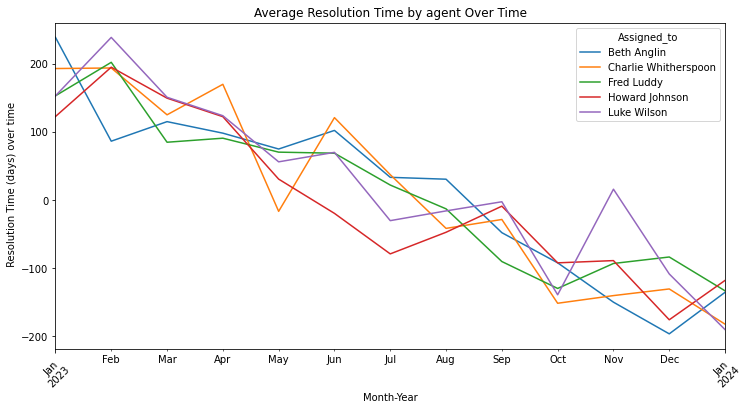

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

# Extract month-year from opened_at and create a new column
df["month_year"] = df["opened_at"].dt.to_period("M")

# Group by month_year and category, then compute average resolution time
df_grouped = (
    df.groupby(["month_year", "assigned_to"])["resolution_time"].mean().unstack()
)

# Plot the data
df_grouped.plot(kind="line", figsize=(12, 6))
plt.title("Average Resolution Time by agent Over Time")
plt.xlabel("Month-Year")
plt.ylabel(" Resolution Time (days) over time")
plt.xticks(rotation=45)
plt.legend(title="Assigned_to")
plt.show()

#### Generate JSON Description for the Insight

In [7]:
{
    "data_type": "descriptive",
    "insight": "TTR is slightly decreasing for all the agents over time",
    "insight_value": {
        "x_val": "Time Period", 
        "y_val": "Slight decrease"
    },
    "plot": {
        "plot_type": "line",
        "title": "Time to Resolution (TTR) Trend Comparison Among Agents",
        "x_axis": {
            "name": "Month-Year",
            "value": ["Jan-2023", "Feb-2023", "Mar-2023", "Apr-2023", "May-2023", "..."],
            "description": "This represents the timeline over which the TTR data is analyzed."
        },
        "y_axis": {
            "name": "Average Resolution Time (days)",
            "value": "line plot",  
            "description": "This represents the average time taken to resolve incidents, measured in days, across different agents."
        },
        "description": "The line plot shows the TTR trends for each agent over several months. "
    },
    "question": "How does the TTR of the specific agent compare to other agents during the same time frame?",
    "actionable_insight": "The decreasing trend in TTR for all agents indicates a potential improvement in incident resolution efficiency over time. However, it is essential to monitor this trend closely to ensure that the decrease is consistent and not due to external factors. If the trend continues, it may be beneficial to analyze the factors contributing to this improvement and implement best practices across the team to further optimize incident resolution times."
}

{'data_type': 'descriptive',
 'insight': 'TTR is slightly decreasing for all the agents over time',
 'insight_value': {'x_val': 'Time Period', 'y_val': 'Slight decrease'},
 'plot': {'plot_type': 'line',
  'title': 'Time to Resolution (TTR) Trend Comparison Among Agents',
  'x_axis': {'name': 'Month-Year',
   'value': ['Jan-2023',
    'Feb-2023',
    'Mar-2023',
    'Apr-2023',
    'May-2023',
    '...'],
   'description': 'This represents the timeline over which the TTR data is analyzed.'},
  'y_axis': {'name': 'Average Resolution Time (days)',
   'value': 'line plot',
   'description': 'This represents the average time taken to resolve incidents, measured in days, across different agents.'},
  'description': 'The line plot shows the TTR trends for each agent over several months. '},
 'question': 'How does the TTR of the specific agent compare to other agents during the same time frame?',
 'actionable_insight': 'The decreasing trend in TTR for all agents indicates a potential improveme

### **Question 3: What is the pattern in the number of incidents assigned to the specific agent over time?**

#### Plot number of incidents assigned per agent
This cell creates a bar plot to visualize the number of incidents assigned to each agent, providing insights into workload distribution and agent responsibility over the assessed period. This plot helps identify if certain agents are consistently assigned more incidents than others, which could indicate potential imbalances!!

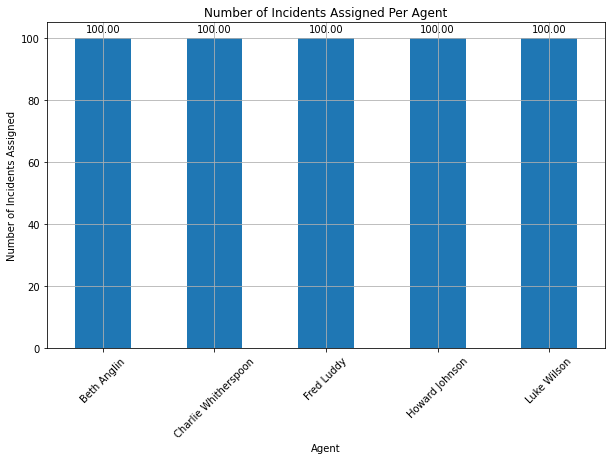

In [8]:
agent_incident_count = df.groupby('assigned_to')['number'].count()

# Plot the histogram
ax = agent_incident_count.plot(kind='bar', figsize=(10,6))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Number of Incidents Assigned Per Agent')
plt.xlabel('Agent')
plt.ylabel('Number of Incidents Assigned')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [9]:
{
    "data_type": "descriptive",
    "insight": "The number of incidents assigned to each agent, including Fred Luddy, remains uniform over time",
    "insight_value": {
        "x_val": "Agents", 
        "y_val": "Uniform Distribution of Incident Assignment"
    },
    "plot": {
        "plot_type": "histogram",
        "title": "Distribution of Incident Assignments Among Agents Over Time",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Charlie Whitherspoon", "Fred Luddy", "Howard Johnson", "Luke Wilson"],
            "description": "This represents the different agents handling incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": [100, 100, 100, 100, 100],  
            "description": "This represents the count of incidents assigned to each agent over the analyzed time period."
        },
        "description": "The histogram displays the number of incidents assigned to each agent over a specific time period. The distribution is relatively uniform across all agents, indicating that workload distribution in terms of number of incidents is even. This suggests that the increasing TTR for Fred Luddy is not due to an excessive number of assignments."
    },
    "question": "What is the pattern in the number of incidents assigned to the specific agent over time?",
    "actionable_insight": "Since the distribution of incident assignments is uniform among all agents, the prolonged TTR for Fred Luddy is unlikely to be caused by an overload of assignments. It may be beneficial to explore other factors such as the complexity of the incidents assigned to Fred, his working methods, or potential personal or systemic issues that might be affecting his performance. Monitoring the trend in the number of open tickets for each agent over time could also provide additional insights into workload management and efficiency."
}

{'data_type': 'descriptive',
 'insight': 'The number of incidents assigned to each agent, including Fred Luddy, remains uniform over time',
 'insight_value': {'x_val': 'Agents',
  'y_val': 'Uniform Distribution of Incident Assignment'},
 'plot': {'plot_type': 'histogram',
  'title': 'Distribution of Incident Assignments Among Agents Over Time',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Charlie Whitherspoon',
    'Fred Luddy',
    'Howard Johnson',
    'Luke Wilson'],
   'description': 'This represents the different agents handling incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [100, 100, 100, 100, 100],
   'description': 'This represents the count of incidents assigned to each agent over the analyzed time period.'},
  'description': 'The histogram displays the number of incidents assigned to each agent over a specific time period. The distribution is relatively uniform across all agents, indicating that workload distribution in terms of numbe

### **Question 4: What is the pattern in the number of open incidents assigned to the specific agent over time?**

#### Plot number of open incidents over time for each agent.
This cell creates a line plot to visualize the number of open incidents assigned to each agent over the time. By examining open incidents per agent, the plot provides  insights into how efficiently incidents are being resolved and highlights any potential issues with case closures or workload management.


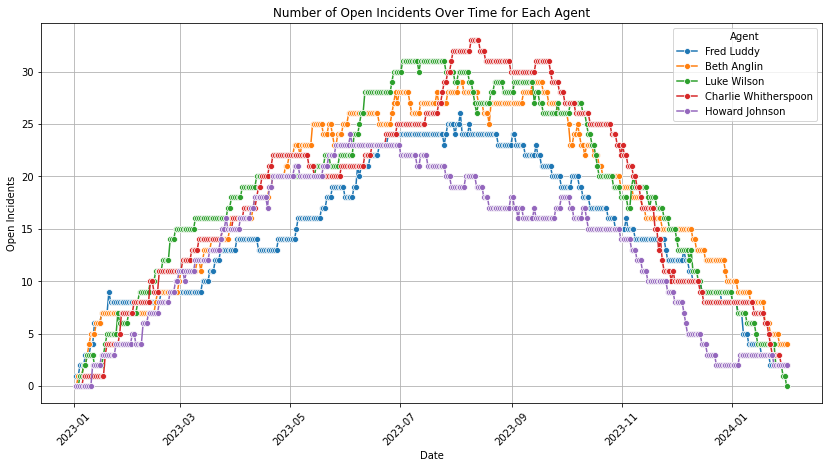

In [10]:
df['opened_at'] = pd.to_datetime(df['opened_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
# Define the current date for the analysis, simulate up to the last 'opened_at' date
current_date = df['opened_at'].max()

# Create a range of dates from the start to the current date
date_range = pd.date_range(start=df['opened_at'].min(), end=current_date, freq='D')

# Function to count open incidents per date
def count_open_incidents(date, agent_data):
    # Incidents that are opened on or before 'date' and are not closed or closed after 'date'
    open_incidents = agent_data[(agent_data['opened_at'] <= date) & ((agent_data['closed_at'].isna()) | (agent_data['closed_at'] > date))]
    return len(open_incidents)

# Initialize a DataFrame to store the results
open_incidents_data = pd.DataFrame()

# Loop through each agent to calculate their open incidents over time
for agent in df['assigned_to'].unique():
    agent_data = df[df['assigned_to'] == agent]
    open_counts = [count_open_incidents(date, agent_data) for date in date_range]
    temp_df = pd.DataFrame({
        'Date': date_range,
        'Open Incidents': open_counts,
        'Agent': agent
    })
    open_incidents_data = pd.concat([open_incidents_data, temp_df], ignore_index=True)

# Plotting the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=open_incidents_data, x='Date', y='Open Incidents', hue='Agent', marker='o')
plt.title('Number of Open Incidents Over Time for Each Agent')
plt.xlabel('Date')
plt.ylabel('Open Incidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Agent')
plt.show()

#### Generate JSON Description for the Insight

In [11]:
{
    "data_type": "diagnostic",
    "insight": "The number of open incidents follow an increasing then decreasing trend for all agents including Luke Wilson. The peak is reached around 2023-09.",
    "insight_value": {
        "x_val": "Time Period", 
        "y_val": "Increasing Number of Open Incidents"
    },
    "plot": {
        "plot_type": "line",
        "title": "Trend of Open Incidents for Fred Luddy Over Time",
        "x_axis": {
            "name": "Month-Year",
            "value": ["Jan-2023", "Feb-2023", "Mar-2023", "Apr-2023", "May-2023"],
            "description": "This represents the timeline over which the open incident data is analyzed."
        },
        "y_axis": {
            "name": "Number of Open Incidents",
            "description": "This represents the count of incidents still open and unresolved, assigned to Fred Luddy over the analyzed time period."
        },
        "description": "The line plot illustrates a clear increasing trend in the number of open incidents. The peak is reached around September 2023, followed by a decreasing trend. This pattern is consistent across all agents, including Luke Wilson."
    },
    "question": "What is the pattern in the number of open incidents assigned to the specific agent over time?",
    "actionable_insight": "The increasing trend in the number of open incidents for all agents, including Luke Wilson, indicates a potential backlog in incident resolution. It is crucial to address this backlog promptly to prevent delays in incident resolution and maintain service levels. Investigating the reasons behind the peak in open incidents around September 2023 and implementing strategies to manage and reduce the backlog can help improve incident resolution efficiency and customer satisfaction."
}

{'data_type': 'diagnostic',
 'insight': 'The number of open incidents follow an increasing then decreasing trend for all agents including Luke Wilson. The peak is reached around 2023-09.',
 'insight_value': {'x_val': 'Time Period',
  'y_val': 'Increasing Number of Open Incidents'},
 'plot': {'plot_type': 'line',
  'title': 'Trend of Open Incidents for Fred Luddy Over Time',
  'x_axis': {'name': 'Month-Year',
   'value': ['Jan-2023', 'Feb-2023', 'Mar-2023', 'Apr-2023', 'May-2023'],
   'description': 'This represents the timeline over which the open incident data is analyzed.'},
  'y_axis': {'name': 'Number of Open Incidents',
   'description': 'This represents the count of incidents still open and unresolved, assigned to Fred Luddy over the analyzed time period.'},
  'description': 'The line plot illustrates a clear increasing trend in the number of open incidents. The peak is reached around September 2023, followed by a decreasing trend. This pattern is consistent across all agents, in

### Summary of Findings (Flag 61):

1. **Trend in Resolution Time**: The analysis reveals that the average Time to Resolution (TTR). However, there are significant variations in the TTR among different agents, with some agents resolving incidents faster than others. This indicates potential disparities in agent performance and efficiency in handling incidents.
   ß
2. **Correlation with Open Incidents**: The analysis also shows a correlation between the number of open incidents and the TTR for specific agents. Agents with a higher number of open incidents tend to have longer resolution times, indicating potential workload management issues or inefficiencies in handling incidents.
   
3. **Strategic Workload Management**: To address these performance disparities and workload management issues, it is essential to implement strategies that balance the workload among agents, provide additional support to agents with higher incident counts, and optimize incident handling processes to improve overall efficiency and performance.